<a href="https://colab.research.google.com/github/perfalcon/pytorch_challenge/blob/master/my_files/My_new_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
#import commands
import subprocess
subprocess.check_output(['nvidia-smi'])

#print(commands.getoutput('nvidia-smi'))

#check the GPU
!pip install gputil
!pip install psutil
!pip install humanize

import psutil
import humanize
import os
import GPUtil as GPU
GPUs =GPU.getGPUs()
gpu=GPUs[0]
for i, gpu in enumerate(GPUs):
    print('GPU {:d} ... Mem Free: {:.0f}MB / {:.0f}MB | Utilization {:3.0f}%'.format(i, gpu.memoryFree, gpu.memoryTotal, gpu.memoryUtil*100))
def printm():
	process = psutil.Process(os.getpid())
	print("Gen RAM Free:"+humanize.naturalsize(psutil.virtual_memory().available)) 
  # for i, gpu in enumerate(GPUs):
  #   print('GPU {:d} ... Mem Free: {:.0f}MB / {:.0f}MB | Utilization {:3.0f}%'.format(i, gpu.memoryFree, gpu.memoryTotal, gpu.memoryUtil*100))
   

printm()

  Running setup.py bdist_wheel for gputil ... - done
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
GPU 0 ... Mem Free: 11441MB / 11441MB | Utilization   0%
Gen RAM Free:12.9 GB


In [2]:
# Import packages
import os,sys,humanize,psutil,GPUtil
# Define function
def mem_report():
  print("CPU RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ))
  
  GPUs = GPUtil.getGPUs()
  for i, gpu in enumerate(GPUs):
    print('GPU {:d} ... Mem Free: {:.0f}MB / {:.0f}MB | Utilization {:3.0f}%'.format(i, gpu.memoryFree, gpu.memoryTotal, gpu.memoryUtil*100))
    
# Execute function
mem_report()


CPU RAM Free: 12.9 GB
GPU 0 ... Mem Free: 11441MB / 11441MB | Utilization   0%


In [3]:
#install the Required Modules

from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

print(accelerator)
if accelerator == 'cu92':
   accelerator="cu91"

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.0-{platform}-linux_x86_64.whl torchvision

cu92
tcmalloc: large alloc 1073750016 bytes == 0x5bbbe000 @  0x7fe92f4102a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641


**Install the PIL **

In [4]:
!pip uninstall -y PILLOW
!pip install -U pillow
!pip install Pillow==5.3.0
import PIL
print(PIL.PILLOW_VERSION)

Uninstalling Pillow-5.3.0:
  Successfully uninstalled Pillow-5.3.0
  Using cached https://files.pythonhosted.org/packages/62/94/5430ebaa83f91cc7a9f687ff5238e26164a779cca2ef9903232268b0a318/Pillow-5.3.0-cp36-cp36m-manylinux1_x86_64.whl
4.0.0


In [1]:
#Restart RunTime
import PIL
print(PIL.PILLOW_VERSION)

5.3.0


# **Mount Google Drive**


In [0]:
from google.colab import drive
drive.mount('/gdrive')

In [0]:
#copy files from google drive to colab
!pwd
!ls -ltr
# Copy the Pytroch_challenge and data
! cp -R "/gdrive/My Drive/Colab Notebooks/pytorch_challenge" .
!ls -ltr
# Unzip the flower_data
!unzip pytorch_challenge/flower_data.zip -d pytorch_challenge


In [43]:
# Imports here
import torch
import numpy as np
import time 
import matplotlib.pyplot as plt
import os
import copy

from torch import nn
from torch import optim
from torch.optim import lr_scheduler
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms, models

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

print(torch.__version__)    
print(PIL.PILLOW_VERSION)

CUDA is available!  Training on GPU ...
0.4.0
5.3.0


# Load Data

In [5]:
data_dir = 'pytorch_challenge/flower_data'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'

print(train_dir)
print(valid_dir)

!find pytorch_challenge/flower_data/train/* -maxdepth 0 -type d | wc -l

pytorch_challenge/flower_data/train
pytorch_challenge/flower_data/valid
102


In [8]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomRotation(30),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
     'test': transforms.Compose([
        transforms.RandomRotation(30),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = 'pytorch_challenge/flower_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'valid']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=14,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'valid']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid']}
class_names = image_datasets['train'].classes
print(class_names)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

['1', '10', '100', '101', '102', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']


In [0]:
import json

with open('pytorch_challenge/cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)

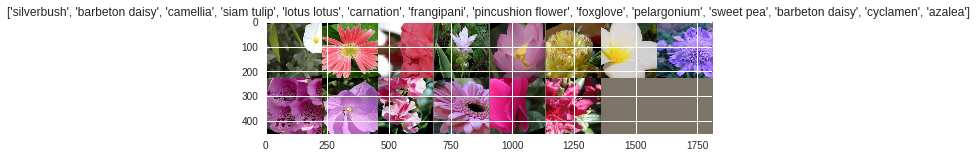

In [34]:
#Check some images
  def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[cat_to_name[class_names[x]] for x in classes])

In [32]:
#load names --- re-visit
import json

with open('pytorch_challenge/cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)
#for flower_cls in cat_to_name.keys():
print(cat_to_name)
#for key in cat_to_name:
  #print(key,cat_to_name[key])
    
for key in range(1,10,1):
  #key = str(k)
  print(key)
  print(cat_to_name[str(key)])

{'21': 'fire lily', '3': 'canterbury bells', '45': 'bolero deep blue', '1': 'pink primrose', '34': 'mexican aster', '27': 'prince of wales feathers', '7': 'moon orchid', '16': 'globe-flower', '25': 'grape hyacinth', '26': 'corn poppy', '79': 'toad lily', '39': 'siam tulip', '24': 'red ginger', '67': 'spring crocus', '35': 'alpine sea holly', '32': 'garden phlox', '10': 'globe thistle', '6': 'tiger lily', '93': 'ball moss', '33': 'love in the mist', '9': 'monkshood', '102': 'blackberry lily', '14': 'spear thistle', '19': 'balloon flower', '100': 'blanket flower', '13': 'king protea', '49': 'oxeye daisy', '15': 'yellow iris', '61': 'cautleya spicata', '31': 'carnation', '64': 'silverbush', '68': 'bearded iris', '63': 'black-eyed susan', '69': 'windflower', '62': 'japanese anemone', '20': 'giant white arum lily', '38': 'great masterwort', '4': 'sweet pea', '86': 'tree mallow', '101': 'trumpet creeper', '42': 'daffodil', '22': 'pincushion flower', '2': 'hard-leaved pocket orchid', '54': 's

In [35]:
# TODO: Build and train your network
#load a pretrained network
model = models.densenet121(pretrained=True)
#model


/usr/local/lib/python3.6/dist-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.torch/models/densenet121-a639ec97.pth
100%|██████████| 32342954/32342954 [00:00<00:00, 82230669.00it/s]


In [0]:
#classifier
# taken from Transfer Learing - Notebook
# Freeze parameters so we don't backprop through them
for param in model.parameters():
    param.requires_grad = False

from collections import OrderedDict
classifier = nn.Sequential(OrderedDict([
                          ('fc1', nn.Linear(1024, 500)),
                          ('relu', nn.ReLU()),
                          ('fc2', nn.Linear(500, 102)),
                          ('output', nn.LogSoftmax(dim=1))
                          ]))
    
model.classifier = classifier
#model
criterion = nn.NLLLoss()
    # Only train the classifier parameters, feature parameters are frozen
#optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)
# Observe that all parameters are being optimized
optimizer = optim.SGD(model.classifier.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)


device=torch.device("cuda" if torch.cuda.is_available else "cpu")

# move tensors to GPU if CUDA is available
model.to(device)

In [0]:
#Fine Tune the Model
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [0]:
def train_model(model, criterion, optimizer, scheduler, n_epochs=1):
   #num_epochs =  # you may increase this number to train a final model

  valid_loss_min = np.Inf # track change in validation loss

  train_loader=dataloaders['train']
  valid_loader=dataloaders['valid']
  for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model.train()    
    
    for data, target in train_loader:
        scheduler.step()
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    model.eval()
    for data, target in valid_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # update average validation loss 
        valid_loss += loss.item()*data.size(0)
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = valid_loss/len(valid_loader.dataset)
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        #filename=time.strftime("%Y%m%d_%H%M%S")
        filename=time.strftime("%Y%m%d")
        filename='pytorch_challenge/model_cifar'+filename+'.pt'
        torch.save(model.state_dict(), filename)#'pytorch_challenge/model_cifar'.pt')
        valid_loss_min = valid_loss

    # load best model weights
    #model.load_state_dict(best_model_wts)
    return model

In [0]:
def train_model_new(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'valid']:
            if phase == 'train':
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
       

            print('{} Loss: {:.4f} \t Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [0]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['valid']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            
            print(i)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(cat_to_name[class_names[preds[j]]])+class_names[preds[j]])
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [0]:
model = train_model(model, criterion, optimizer, exp_lr_scheduler,n_epochs=1)

In [62]:
model = train_model_new(model, criterion, optimizer, exp_lr_scheduler,num_epochs=25)

Epoch 0/24
----------
train Loss: 4.6130 Acc: 0.0093
valid Loss: 4.6174 Acc: 0.0098

Epoch 1/24
----------
train Loss: 4.6126 Acc: 0.0072
valid Loss: 4.6207 Acc: 0.0061

Epoch 2/24
----------
train Loss: 4.6130 Acc: 0.0073
valid Loss: 4.6204 Acc: 0.0073

Epoch 3/24
----------
train Loss: 4.6135 Acc: 0.0102
valid Loss: 4.6181 Acc: 0.0086

Epoch 4/24
----------
train Loss: 4.6123 Acc: 0.0082
valid Loss: 4.6178 Acc: 0.0061

Epoch 5/24
----------
train Loss: 4.6121 Acc: 0.0093
valid Loss: 4.6191 Acc: 0.0086

Epoch 6/24
----------
train Loss: 4.6129 Acc: 0.0093
valid Loss: 4.6211 Acc: 0.0073

Epoch 7/24
----------
train Loss: 4.6128 Acc: 0.0079
valid Loss: 4.6181 Acc: 0.0073

Epoch 8/24
----------
train Loss: 4.6127 Acc: 0.0084
valid Loss: 4.6199 Acc: 0.0086

Epoch 9/24
----------
train Loss: 4.6126 Acc: 0.0067
valid Loss: 4.6200 Acc: 0.0098

Epoch 10/24
----------
train Loss: 4.6146 Acc: 0.0060
valid Loss: 4.6189 Acc: 0.0110

Epoch 11/24
----------
train Loss: 4.6135 Acc: 0.0079
valid Loss

0


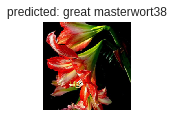

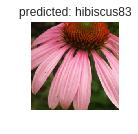

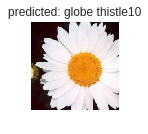

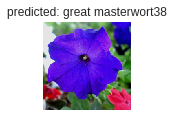

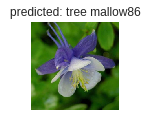

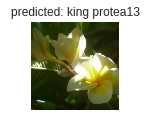

In [65]:
visualize_model(model)

In [0]:
  filename=time.strftime("%Y%m%d")
  filename='pytorch_challenge/model_new'+filename+'.pt'
  torch.save(model.state_dict(), filename)#'pytorch_challenge/model_new'.pt')

In [67]:
!ls -ltr "/gdrive/My Drive/Colab Notebooks/pytorch_challenge" 
!cp "pytorch_challenge/model_new20181224.pt"  "/gdrive/My Drive/Colab Notebooks/pytorch_challenge" 
!ls -ltr "/gdrive/My Drive/Colab Notebooks/pytorch_challenge" 

total 363833
drwx------ 2 root root      4096 Dec 16 21:01  my_files
drwx------ 2 root root      4096 Dec 16 21:01  flower_data
drwx------ 2 root root      4096 Dec 16 21:01  assets
-rw------- 1 root root      2218 Dec 16 21:01  cat_to_name.json
-rw------- 1 root root 311442766 Dec 22 02:54  flower_data.zip
-rw------- 1 root root  30554279 Dec 23 17:10  model_cifar20181223.pt
-rw------- 1 root root     16680 Dec 24 18:04 'Image Classifier Project.ipynb'
-rw------- 1 root root  30535066 Dec 24 18:05  model_cifar20181224.pt
total 393652
drwx------ 2 root root      4096 Dec 16 21:01  my_files
drwx------ 2 root root      4096 Dec 16 21:01  flower_data
drwx------ 2 root root      4096 Dec 16 21:01  assets
-rw------- 1 root root      2218 Dec 16 21:01  cat_to_name.json
-rw------- 1 root root 311442766 Dec 22 02:54  flower_data.zip
-rw------- 1 root root  30554279 Dec 23 17:10  model_cifar20181223.pt
-rw------- 1 root root     16680 Dec 24 18:04 'Image Classifier Project.ipynb'
-rw------- 1 r